Emilio Casella matr.204898

# Progetto: Fake Job Posting Prediction


Il progresso tecnologico dell'era moderna, ha permesso agli annunci di lavoro di essere a portata di un click per chiunque ne abbia bisogno.
Tuttavia, è doveroso saper distinguere un annuncio reale da uno ingannevole o fittizio, per non incorrere in spiacenti inconvenevoli.
L'elaborato proprosto riguarda l'implementazione di un predittore che, tramite l'utilizzo di una rete neurale e di tecniche particolari di embeddings, analizza gli annunci indirizzando l'utente nella scelta corretta, con margine di errore molto basso e non necessitando di particolari requisiti.

Verrà quindi affrontato un problema di classificazione che userà come metrica vari score (accuracy, precision,recall, f1 score, auc score).

Ricapitolando l'elaborato includerà i seguenti punti:

1.Identificazione dei tratti e/o delle caratteristiche principali dei post di natura fraudolenta;

2.Produzione di un embedding per l'identificazione di post simili, con lo scopo di scovare caratteristiche intrinseche nel dataset;

3.Creazione di un modello di classificazione che supporta dati di testuali e meta-funzionalità, permettendo di prevedere quali post sono fraudolenti e quali no.

## Dati Analizzati:

Il set di dati analizzati, prodotto dall' Università di Aegean | Laboratorio di Information & Communication Systems Security, contiene 18K post inerenti ad annunci di lavoro, di cui circa 800 fittizi. 
I dati sono costituiti sia da informazioni testuali che da meta-informazioni, permettendo di utilizzare il dataset con lo scopo di creare un modello di classificazione.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/emili/Desktop/DM/fake_job_postings.csv")
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


Troviamo i seguenti attribbuti:

job_id:  l'ID univoco per ogni singola voce nel set di dati;

title: il titolo dell'annuncio;

location: la posizione di lavoro nel formato: Paese, Stato, Città;

dipartment:il dipartimento aziendale in cui inserire la figura richiesta;

salary_range: l'intervallo salariale per la posizione;

company_profile: una panoramica dell'azienda;

description: una panoramica della descrizione del lavoro;

requirements: una panoramica dei requisiti necessari;

benefits: una panoramica dei vantaggi offerti da questo lavoro / azienda;

telecommuting: se questo lavoro è telecommuting (1) o meno (0);

has_company_logo: se questo annuncio di lavoro ha o meno il logo dell'azienda;

has_questions: se questo annuncio di lavoro ha un questionario in allegato;

employment_type: se questo lavoro è part-time, full-time, ecc;

required_experience: esperienza richiesta;

required_education: quale grado d'istruzione è necessario;

industry: settore lavorativo: moda, informatica, ecc;

function: keyword riassuntiva della posizione lavorativa;

fraudolent: etichetta target, 0 se posto di lavoro reale, 1 se posto di lavoro falso.


## Esplorazione e preparazione dei dati 

Il dataset è composto da 17880 righe contenenti 18 attributi per riga.

In [0]:
print(df.shape)

(17880, 18)


Per prima cosa si valuta la consistenza di quest'ultimi, controllando il quantitativo di valori nulli 
per ogni colonna.

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

Questa analisi porta ad escludere, oltre alla colonna job_id, gli attributi department e salary_range che presentano pochi valori diversi da null e quindi non utili allo studio in oggetto.
Inoltre, la tabella industry è ridondante rispetto all'attributo function.

La tabella sottostante visualizza meglio il tutto:

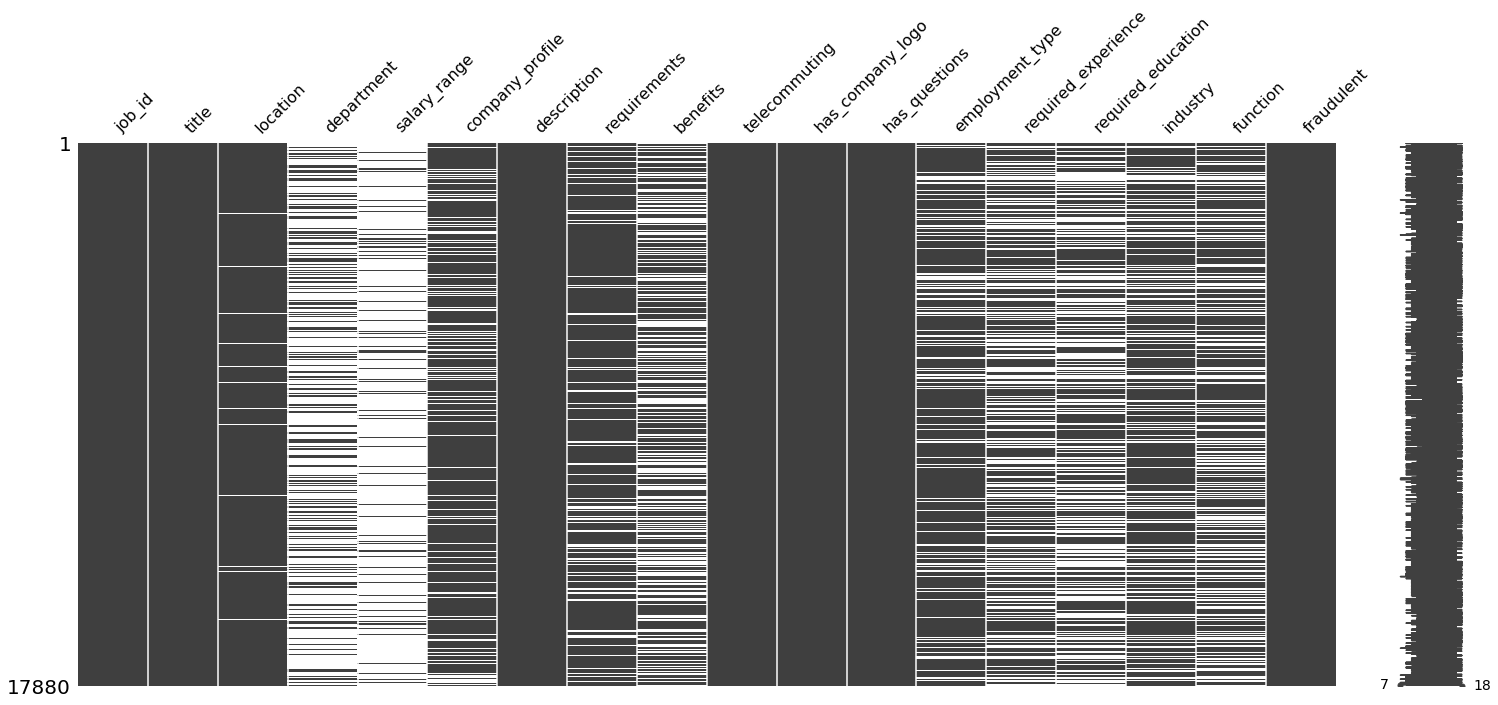

In [0]:
import missingno as ms#tool per la visualizzazione di valori mancanti
ms.matrix(df)
plt.show()

In [0]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


La funzione describe() non è molto utile in questo caso, essendo la maggior parte delle info di tipo testuale e i
valori restanti, elencati dal metodo, indicano valori booleani.

Si divide la tabella in due DataFrame, in modo da semplificare le operazioni successive. 

Nella prima vengono inseriti i dati contenenti informazioni testuali più complesse;

In [0]:
df1 = df[["title", "company_profile", "description", "requirements", "benefits","fraudulent"]]
df1 = df1.fillna("None")
df2 = df[["telecommuting", "has_company_logo", "has_questions", "employment_type", "required_experience", "required_education", "function","fraudulent"]]
df2 = df2.fillna("None")

In [0]:
df1.head()

,title,company_profile,description,requirements,benefits,fraudulent
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,None,0
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,None,0
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0


I restanti valori, formano la seconda tabella. Si noti che la colonna fraudulent (target) è presente in ambo le tabelle, in quanto utile nelle analisi successive.

In [0]:
df2.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent
0,0,1,0,Other,Internship,None,Marketing,0
1,0,1,0,Full-time,Not Applicable,None,Customer Service,0
2,0,1,0,None,None,None,None,0
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Sales,0
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Health Care Provider,0


Si analizza la percentuale di post del dataset, identificati come veri o falsi:

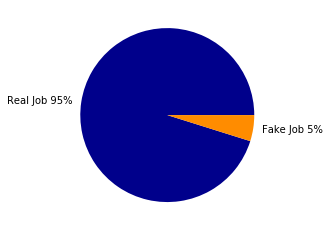

In [0]:
pie=df1["fraudulent"].value_counts()
real=np.round((pie[0]/len(df1["fraudulent"]))*100).astype(int)
fake=np.round((pie[1]/len(df1["fraudulent"]))*100).astype(int)
labels=["Real Job "+str(real)+"%","Fake Job "+str(fake)+"%"]
plt.pie(pie, labels=labels,colors=['darkblue','darkorange'])
plt.show()

Come si può notare il dataset è sbilanciato, presentando il 95% di annunci veritieri e solo il 5% di annunci falsi.
Questa informazione è di grande rilevanza per le analisi successive, rendendo doverosi alcuni accorgimenti in seguito.

D'ora in avanti, i grafici di colore blu riguarderanno gli annunci reali, quelli di colore arancione quelli fraudolenti.

Si analizza più nel dettaglio la prima tabella creata:

In [0]:
def parole(i,j):
     return df1[df1["fraudulent"]==i][j].str.split().map(lambda x: len(x))

def istogrammi(j):
    fig,(hist1,hist2)= plt.subplots(ncols=2, figsize=(20, 5), dpi=200)
    p1=parole(0,j)
    p2=parole(1,j)
    hist1.hist(p1,color='darkblue')
    hist2.hist(p2,color='darkorange')
    hist1.set_title('Number of words in real posts in ' + j +' column')
    hist2.set_title('Number of words in fake posts in '+ j +' column')
    plt.show()   

Tramite queste funzioni, si analizza il quantitativo di parole contenuto nei vari post, reali o meno.

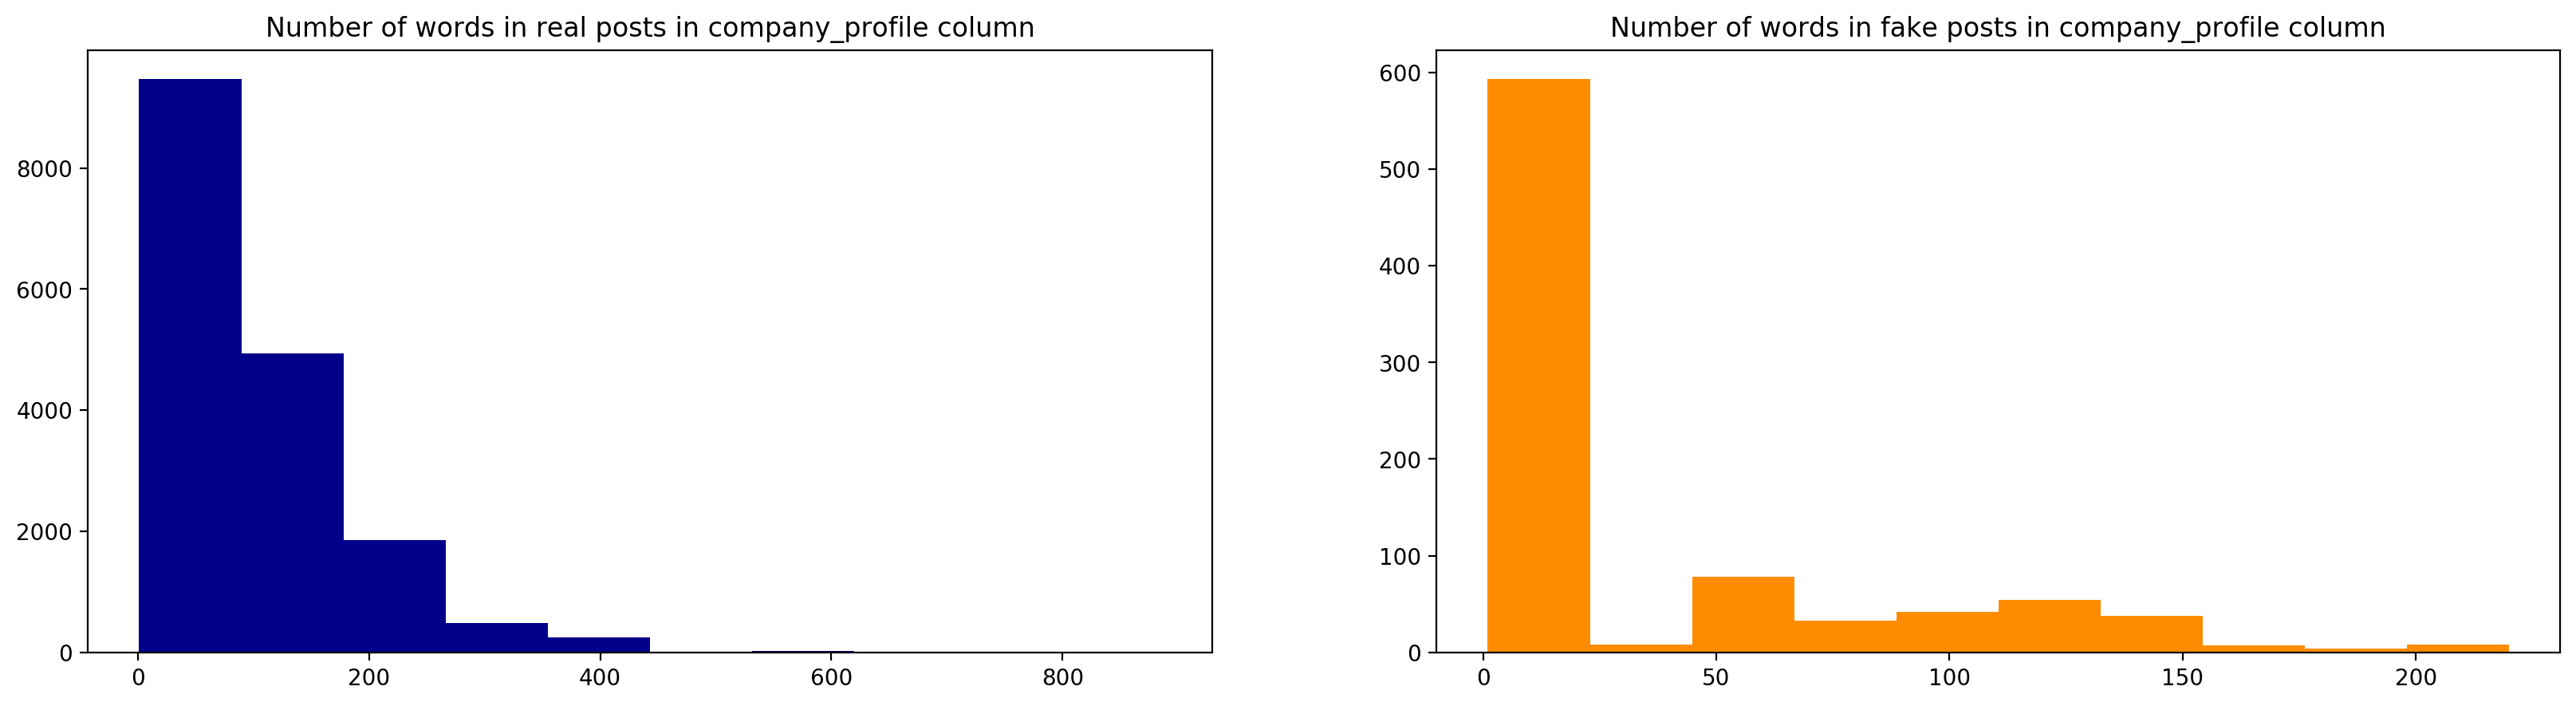

In [0]:
istogrammi('company_profile')

Si noti che il numero di parole contenute nella descrizione aziendale è di gran lunga inferiore nei post falsi poichè, fondandosi su un qualcosa che non esiste, non è possibile descrivere dettagliatamente il profilo aziendale.

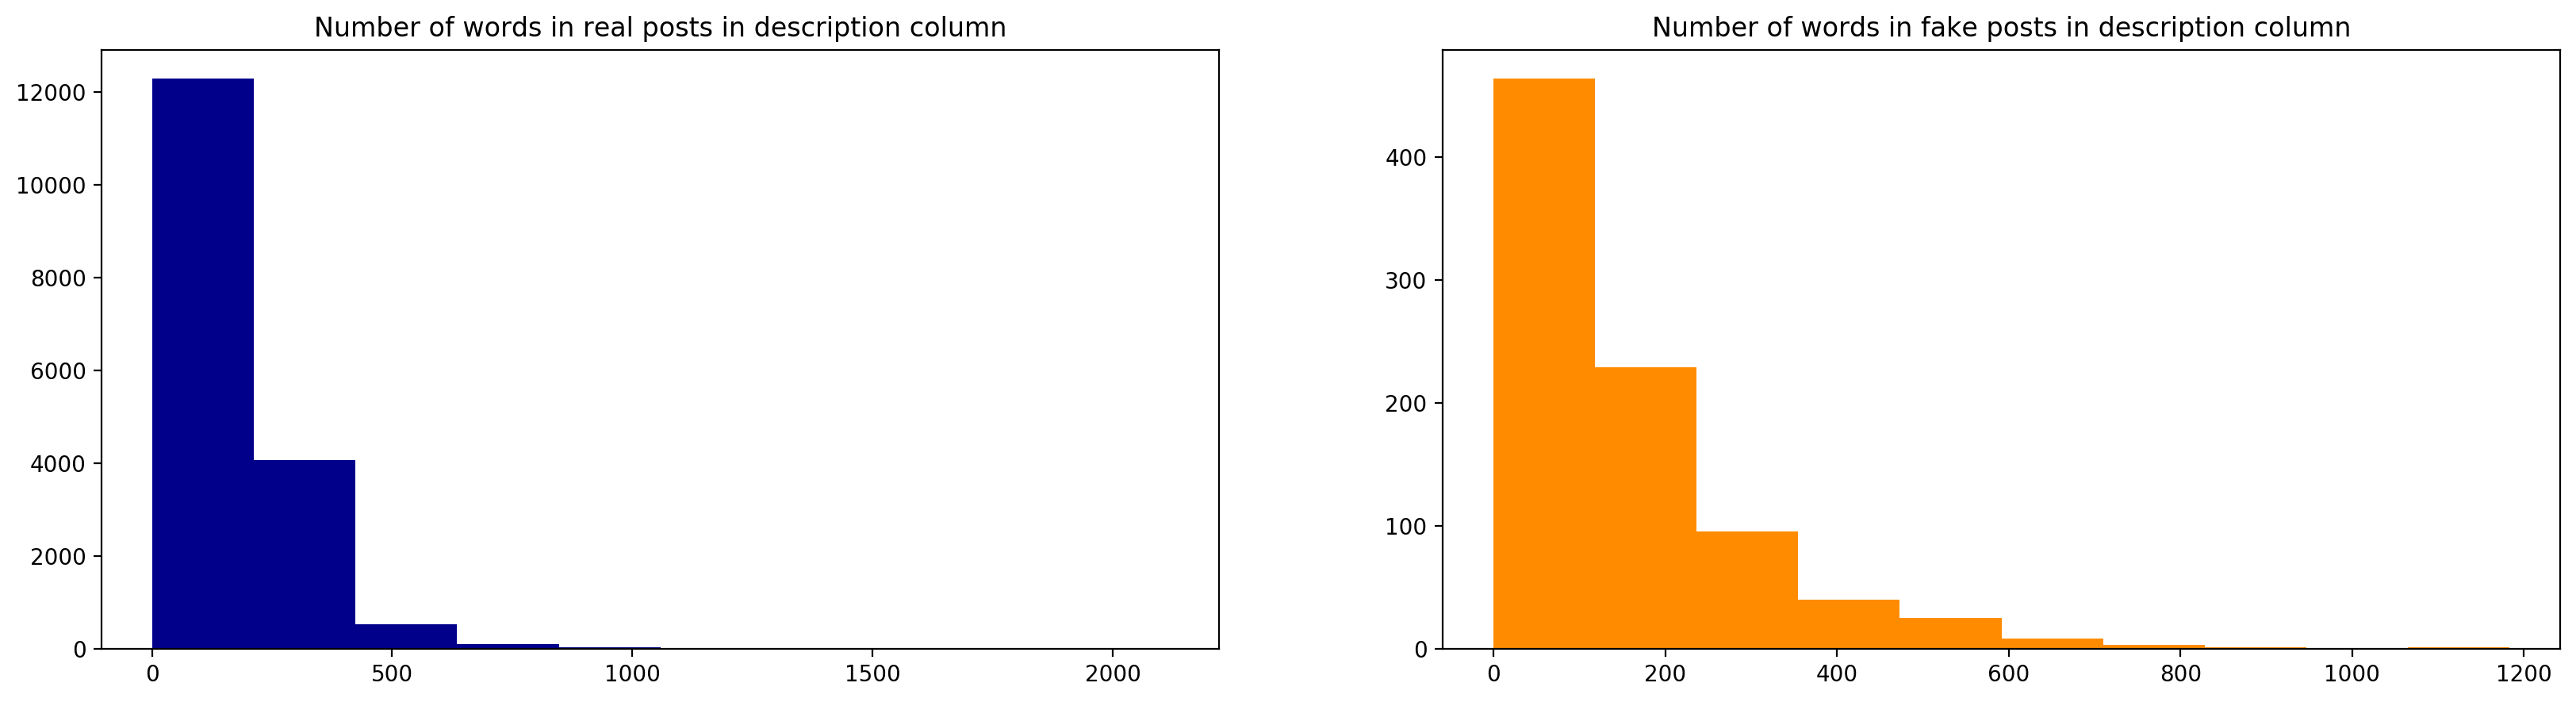

In [0]:
istogrammi('description')

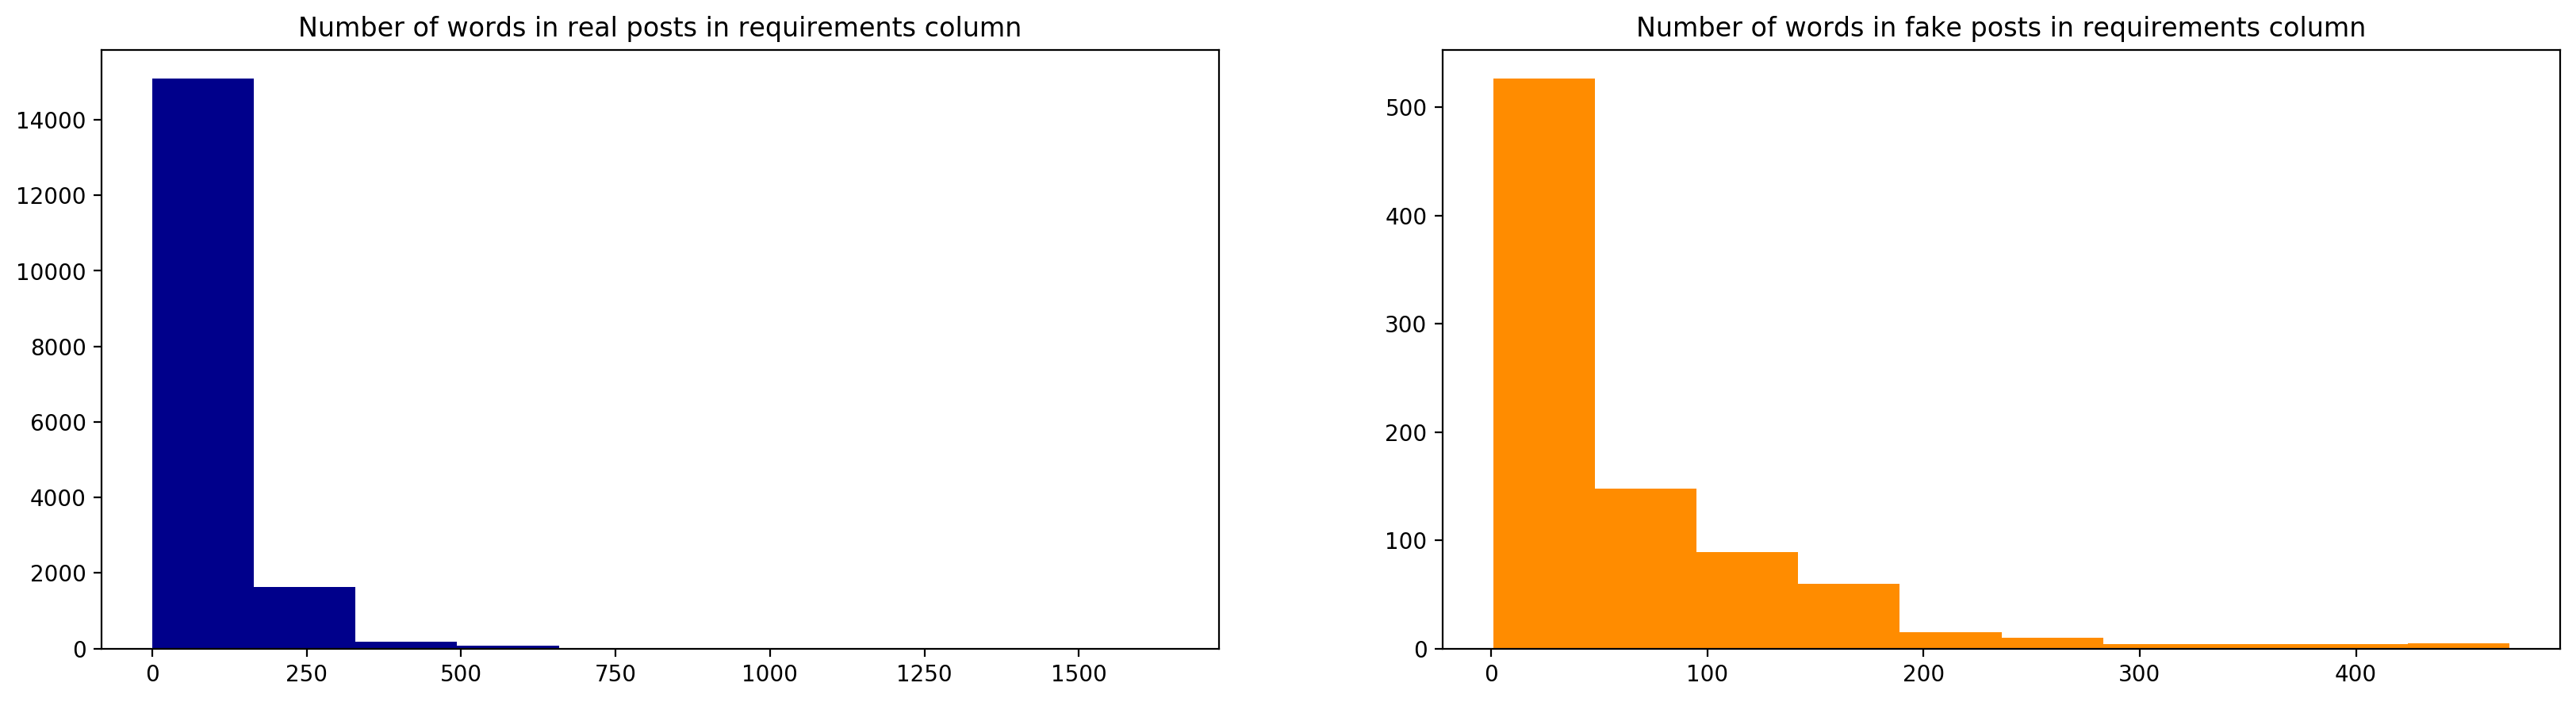

In [0]:
istogrammi('requirements')

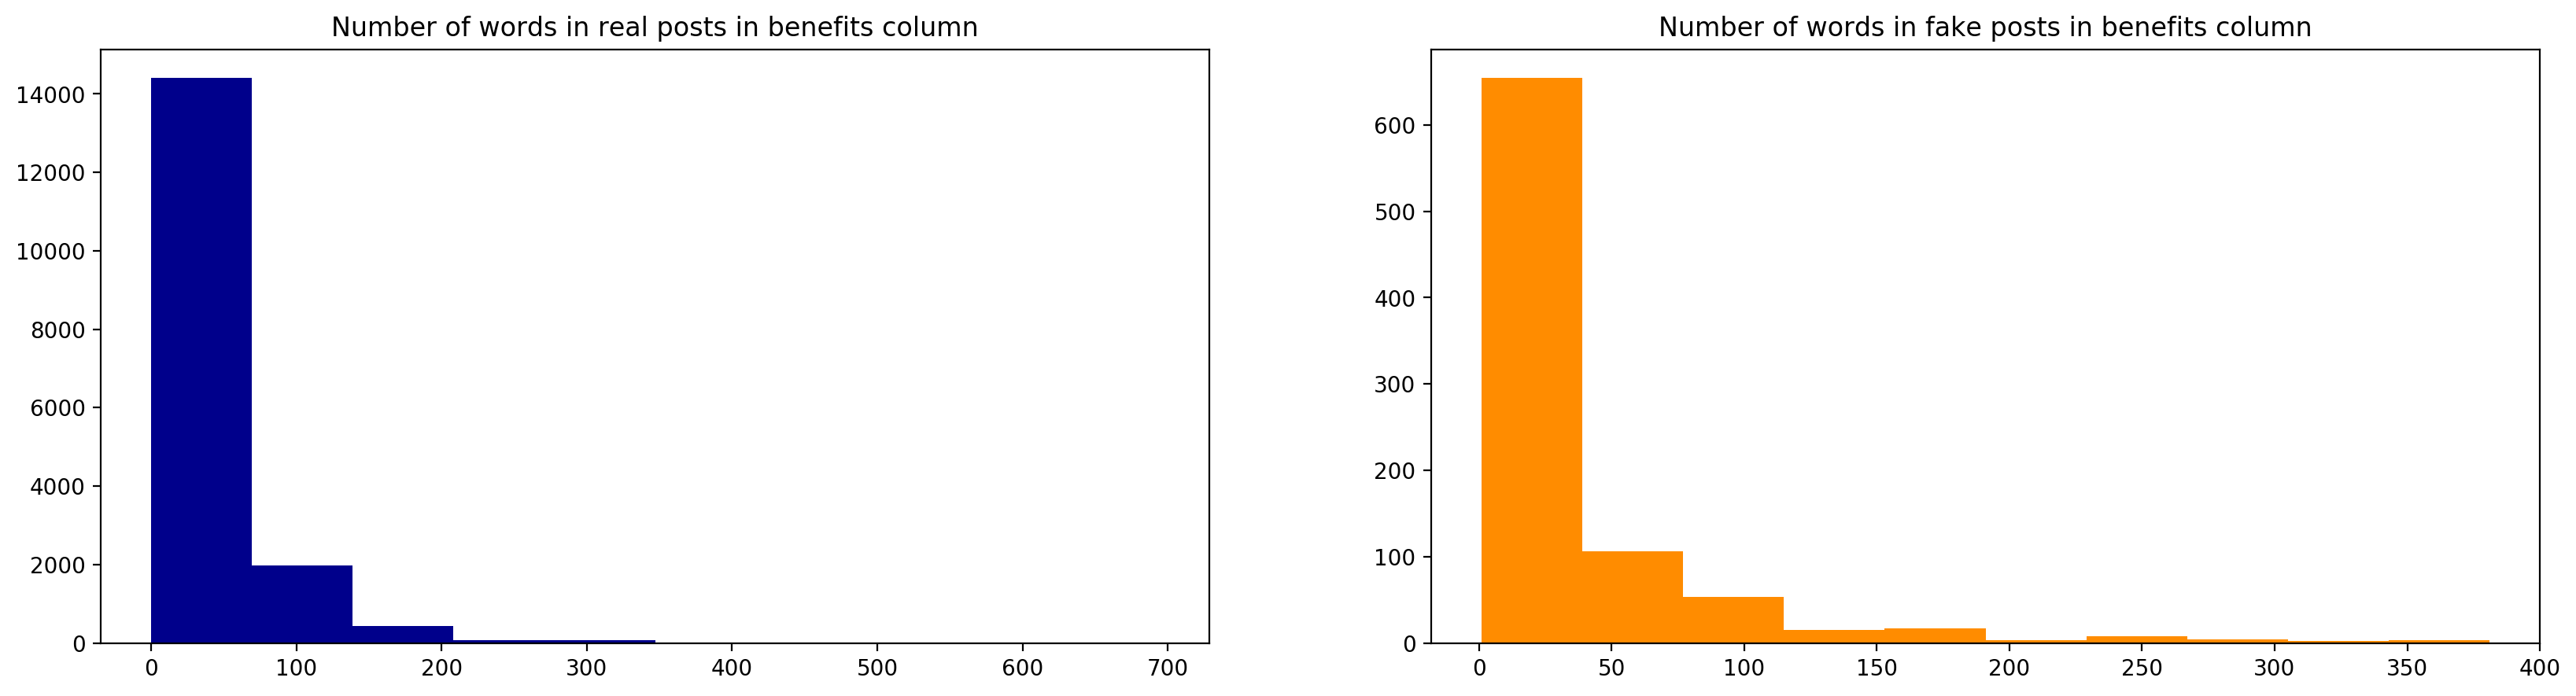

In [0]:
istogrammi('benefits')

Per le restanti colonne, la distribuzione delle parole è abbastanza simile; concludendo che per queste un post fraudolento cerca di imitare il più possibile l'andamento delle parole.

Si analizza ora il contenuto della colonna concerne il titolo degli annunci:

In [0]:
def titolo(i):
  plt.figure(1,figsize=(20,8))
  plt.xticks(rotation='90')
  dfx = df1[df1['fraudulent'] == i]
  if(i==0):
    custom_palette = ["darkblue"]
    sns.set_palette(custom_palette)
    sns.countplot(hue=dfx.fraudulent,x=dfx.title ,data=dfx, order = dfx.title.value_counts().iloc[:100].index)
  else:
    custom_palette = ["darkorange"]
    sns.set_palette(custom_palette)
    sns.countplot(hue=dfx.fraudulent,x=dfx.title ,data=dfx, order = dfx.title.value_counts().iloc[:100].index)
  plt.xlabel(" ")
  plt.ylabel(" ")
  if(i==0):
    plt.title("Headline analysis in real posts")
    plt.legend('Real')
  else:
    plt.title('Headline analysis in fake posts')
    plt.legend('Fake')



Si evince che buona parte degli annunci reali riguarda l'apertura di posizioni come insegnanti di inglese oppure come addetti al servizio clienti,sviluppatori o manager, come si può ammirare dal grafico sottostante.

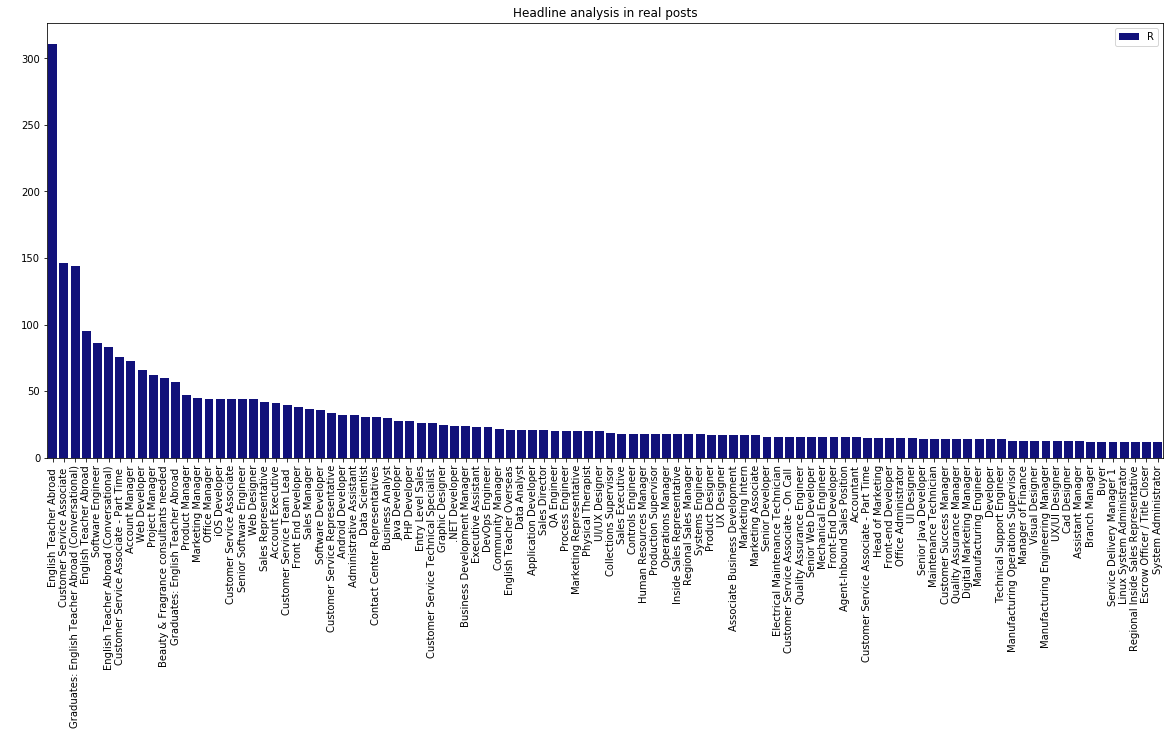

In [0]:
titolo(0)

La maggior parte degli annunci fraudolenti, invece, presenta keywords ricorrenti come urgente, lavoro da casa, range di salario giornaliero,
assistenti o data entry.

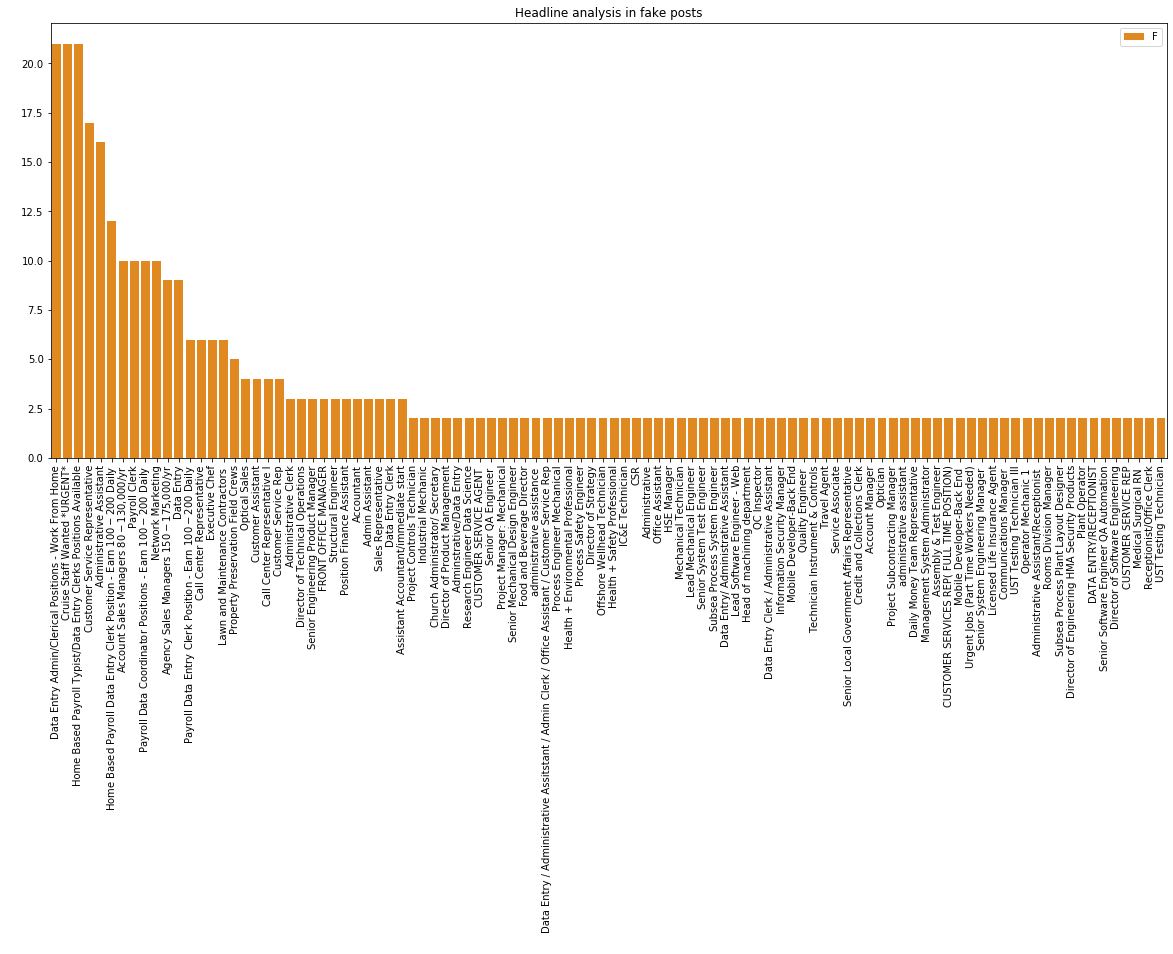

In [0]:
titolo(1)

Le restanti colonne della prima tabella, saranno utilizzate in seguito nella realizzazione del modello di predizione.

Si passa ora all'analisi degli attributi della seconda tabella:

In [0]:
import matplotlib.pyplot as plt

import matplotlib.gridspec as gridspec 

def tabella(vector,target):
    dfx = df2[df2['fraudulent'] == target]
    tab=dfx.drop(dfx.columns[vector], axis='columns')
    grid = gridspec.GridSpec(5, 2, wspace=0.5, hspace=0.5) 
    plt.figure(figsize=(15,25))
    for i,j in enumerate(tab): 
        ax = plt.subplot(grid[i])
        if(target==0):
          custom_palette = ["darkblue"]
          sns.set_palette(custom_palette)
          sns.countplot(x=j, data=dfx, hue='fraudulent', order=dfx[j].value_counts().iloc[:5].index)
        else:
          custom_palette = ["darkorange"]
          sns.set_palette(custom_palette)
          sns.countplot(x=j, data=dfx, hue='fraudulent', order=dfx[j].value_counts().iloc[:5].index)
        ax.set_ylabel(" ")
        ax.set_xlabel(" ")
        if(target==0):
          ax.set_title(j+' in Real posts') 
        else:
          ax.set_title(j+' in Fake posts') 
        ax.get_legend().remove()
        if(j=='telecommuting' and target==0):
          plt.xticks([0, 1], ['No', 'Yes'],rotation=30)
        elif((j=='has_company_logo' and target==0) or (j=='has_questions' and target==0)):
          plt.xticks([0, 1], ['Yes', 'No'],rotation=30)
        elif((j=='telecommuting' or j=='has_company_logo' or j=='has_questions') and target==1):
          plt.xticks([0, 1], ['No', 'Yes'],rotation=30)
        else:
          plt.xticks(rotation=30) 
        total = len(tab)
        sizes=[] 
        for p in ax.patches: 
            height = p.get_height()
            sizes.append(height)
            ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}%'.format((height/total)*100),ha="center", fontsize=10)
    plt.show()  
       

La quasi totalità degli annunci reali non offre lavoro telecommuting (da casa con comunicazioni per email etc.) e presenta un logo dell'azienda nel post.
Si precisa, inoltre, che la metà degli annunci offre un questioniaro.

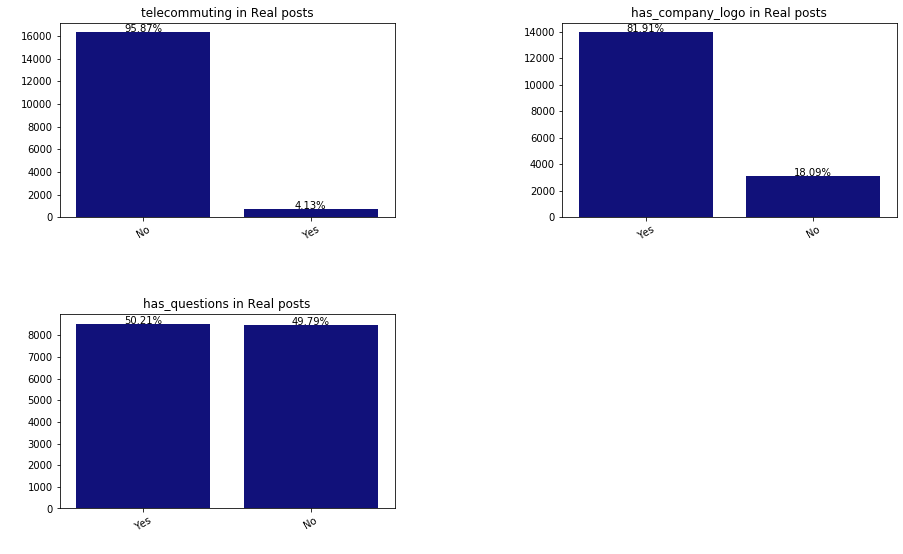

In [0]:
tabella([3,4,5,6,7],0)#si passano gli indici delle colonne da escludere 

Per quanto riguarda l'attributo telecommuting, si ricalca lo stesso andamento degli annunci reali ma questo dato è in contrasto
con quanto rivelato dall'analisi testuale del titolo degli annunci fraudolenti, non garantendo coerenza tra titolo e posizione richiesta nell'annuncio.
Inoltre, circa i 2/3 degli annunci non presenta loghi aziendali e relativi questionari di accesso, trattandosi di società fittizie.

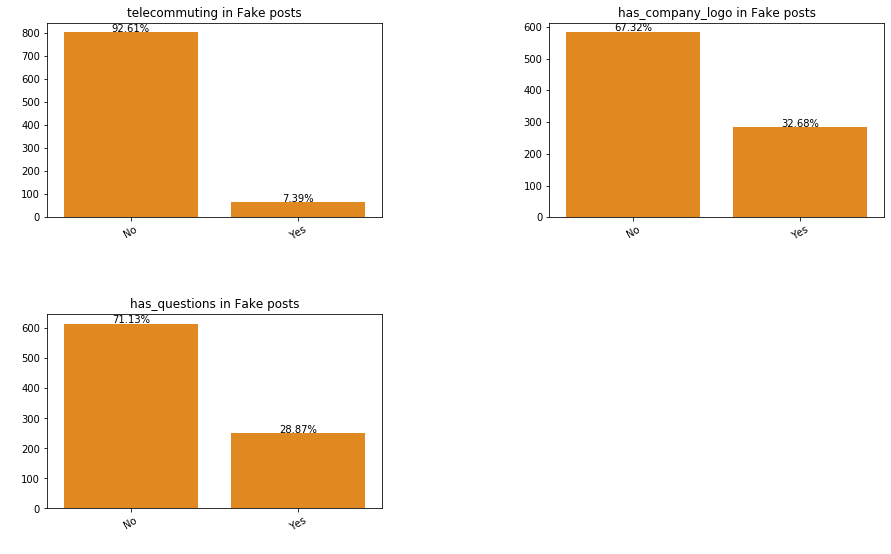

In [0]:
tabella([3,4,5,6,7],1)#si passano gli indici delle colonne da escludere 

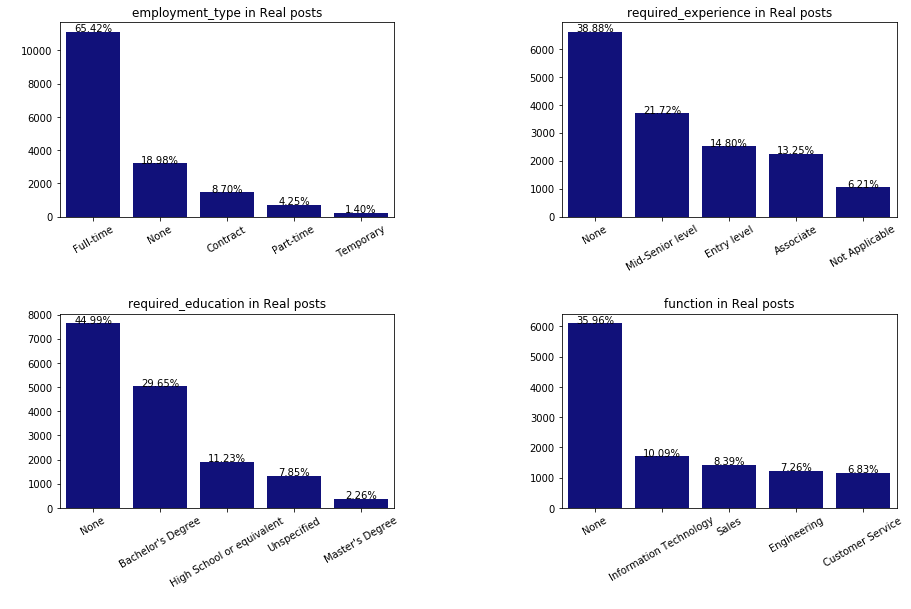

In [0]:
tabella([0,1,2,7],0)#si escude la colonna industry in quanto è ridondante a function

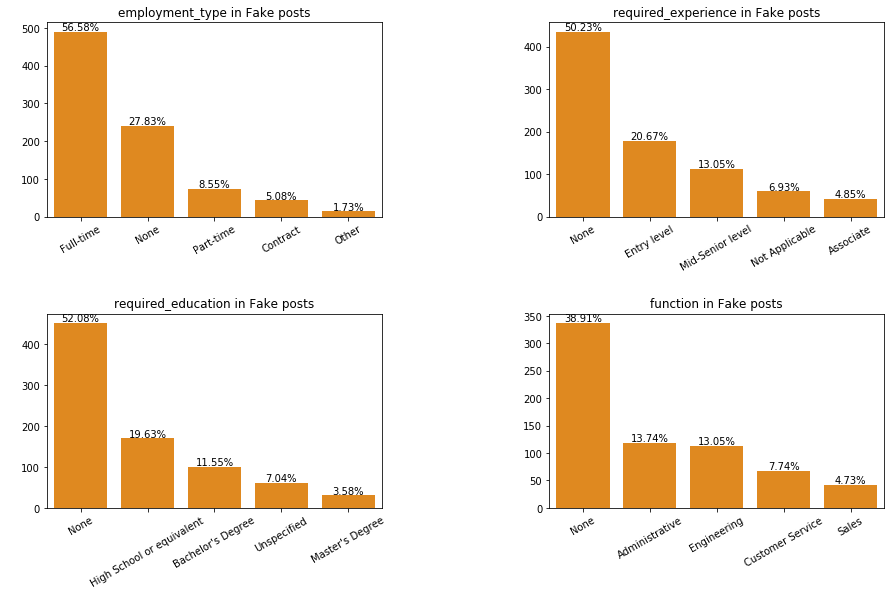

In [0]:
tabella([0,1,2,7],1)#si escude la colonna industry in quanto è ridondante a function

Il 65% degli annunci veritieri, così come il 50% di quelli fraudolenti, offre posizioni di lavoro a tempo indeterminato.

I dati più significativi ricavati dalla seconda tabella indicano che il 38% degli annunci reali non richiede esperienza specifica così come il 21% richiede un'eseprienza mid-senior e cosi' via; con percentuali che si abbassano man mano che il grado di esperienza richiesta decresce.
La metà degli annunci fraudolenti,però, non richiede un'esperienza specifica e il 20% ne richiede una basilare.

Un andamento simile si rispecchia anche nella terza tabella, concerne il grado di istruzione richiesto, portando a 
concludere che esiste un'alta correlazione tra le due tabelle e quindi tra il grado di istruzione/esperienza richiesti, soprattutto negli annunci fraudolenti.

L'ultima tabella mostra che circa il 36% di annunci reali non specifica la posizione lavorativa ricercata, così come buona parte dei fraudolenti.

Si noti che la maggior parte degli annunci fraudolenti vuole ingannare i lettori cercando di avvicinarsi il più 
possibile alla conformazione media di un annuncio veritiero.
Si deduce che un annuncio di lavoro falso cercherà di attirare l'attenzione con keyword del tipo "ore facili e divertenti!",fornendo tanti vantaggi e nessun requisito.

## Creazione del modello 

Prima di passare alla creazione del modello,le colonne 'company_profile','description','requirements','benefits', contenenti dati testuali, vengono ripulite di tutto il non necessario e tokenizzate.

In [0]:
import re
import string
import nltk
from nltk.corpus import stopwords
import gensim

from sklearn.base import BaseEstimator, TransformerMixin

def prep_text(text):
        text = text.lower()
        text = re.sub('\[.*?\]', '', text)
        text = re.sub('https?://\S+|www\.\S+', '', text)
        text = re.sub('<.*?>+', '', text)
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
        text = re.sub('\n', '', text)
        text = re.sub('\w*\d\w*', '', text)
        tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
        text=tokenizer.tokenize(text)
        stop_words = stopwords.words('english')
        text=remove_stopwords(text,stop_words)
        return ' '.join(text)
    
def remove_stopwords(text,stop_words):
    words = [w for w in text if w not in stop_words]
    return words

class MyTokenizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        return self
    
    def transform(self, X,y):
        for c in y:
            for i in range(0,len(X[c])):
                X.at[i,c] =prep_text(X[c][i])

            

In [0]:
columns=['company_profile','description','requirements','benefits']
MyTokenizer().transform(df1,columns)
df1.head()


,title,company_profile,description,requirements,benefits,fraudulent
0,Marketing Intern,weve created groundbreaking awardwinning cooki...,fastgrowing james beard awardwinning online fo...,experience content management systems major pl...,none,0
1,Customer Service - Cloud Video Production,seconds worlds cloud video production seconds ...,organised focused vibrant awesomedo passion cu...,expect youyour key responsibility communicate ...,get usthrough part seconds team gainexperience...,0
2,Commissioning Machinery Assistant (CMA),valor services provides workforce solutions me...,client located houston actively seeking experi...,implement precommissioning commissioning proce...,none,0
3,Account Executive - Washington DC,passion improving quality life geography heart...,company esri environmental systems research in...,education bachelor master gis business adminis...,culture anything corporate collaborative creat...,0
4,Bill Review Manager,spotsource solutions llc global human capital ...,job title itemization review managerlocation f...,qualificationsrn license state texasdiploma ba...,full benefits offered,0


Per la creazione dell'embendding, si è scelto di utilizzare la rete neurale Word2Vec.

Word2vec consiste in una traduzione di parole o frasi in vettori composti da numeri reali.
Questi modelli non sono altro che delle reti neurali a due livelli che sono addestrate (tramite un approccio
non supervisionato) per ricostruire i contesti linguistici delle parole, prendendo come input un grande
frammento di testo e costruendo uno spazio vettoriale, tipicamente di diverse centinaia di dimensioni, in cui
ogni parola è univocamente assegnata ad un vettore nello spazio,seguendo un certo criterio.
Infatti i vettori (rappresentanti le parole) vengono posizionati nello spazio cosicché le parole che risultino
"simili" all’interno del frammento di testo, siano collocate vicine tra loro nello spazio stesso.
L’idea è quella di riuscire ad incapsulare relazioni differenti tra le parole, come ad esempio sinonimi, contrari
o analogie.


Si utilizzerà questa struttura per la creazione di una rappresentazione vettoriale (con approccio skip gram) di ogni cella, ottenuta compiendo un'iterazione
per una sola epoca, in modo da non appesantire il carico computazione e giustificando anche la presenza di qualche numero reale negativo.
Infatti, non si vuole ottenere la predizione delle parole vicine ma si cerca di avere una rappresentazione affine per annunci affini.

Ricapitolando, celle simili avranno rappresentazioni simili (caratterizzata da numeri reali) e saranno formate da un numero di vettori pari al numero di parole.

In [0]:
import multiprocessing
cores = multiprocessing.cpu_count()

def convert_mean(text):
    model=gensim.models.Word2Vec(size=100, min_count=0, workers=cores-1)
    model.build_vocab(text)
    vectors=model.wv.vectors
    return vectors

class Meanw2v(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        return self
    
    def transform(self, X,y):
        for c in y:
            for i in range(0,len(X[c])):
                X.at[i,c] =convert_mean(X[c][i])

In [0]:
columns=['company_profile','description','requirements','benefits']
dfw2v=df1.copy()
dfw2v=dfw2v.drop(df1.columns[[0]], axis='columns')
Meanw2v().transform(dfw2v,columns)
dfw2v.head()

,company_profile,description,requirements,benefits,fraudulent
0,"[[0.002512395, -0.0018428579, -0.0033226658, -...","[[0.002512395, -0.0018428579, -0.0033226658, -...","[[0.002512395, -0.0018428579, -0.0033226658, -...","[[0.004730176, -0.0020128284, 0.000109788256, ...",0
1,"[[0.002512395, -0.0018428579, -0.0033226658, -...","[[0.002512395, -0.0018428579, -0.0033226658, -...","[[0.0025863075, 0.0011173666, 0.004802479, -0....","[[0.002512395, -0.0018428579, -0.0033226658, -...",0
2,"[[0.002512395, -0.0018428579, -0.0033226658, -...","[[0.0025863075, 0.0011173666, 0.004802479, -0....","[[0.0025863075, 0.0011173666, 0.004802479, -0....","[[0.004730176, -0.0020128284, 0.000109788256, ...",0
3,"[[0.002512395, -0.0018428579, -0.0033226658, -...","[[0.0025863075, 0.0011173666, 0.004802479, -0....","[[0.0025863075, 0.0011173666, 0.004802479, -0....","[[0.0025863075, 0.0011173666, 0.004802479, -0....",0
4,"[[0.002512395, -0.0018428579, -0.0033226658, -...","[[0.0025863075, 0.0011173666, 0.004802479, -0....","[[0.0025863075, 0.0011173666, 0.004802479, -0....","[[-0.004824576, -0.00040782045, 0.00039279088,...",0


Per classificare i vettori, si utilizza una tecnica di feauteres extraction tipica della Computer Vision, applicata però al contesto di text mining.

Tutto ciò è possibile grazie alla similarità tra la rappresentazione vettoriale dei punti chiave di ogni immagine e la schematizzazione del testo; utilizzando entrambe vettori di reali per rappresentare l'oggetto in esame.

L'algoritmo compie i seguenti passi ed è applicato alle colonne 'company_profile','description','requirements','benefits':

1. Ogni vettore ha una rappresentazione multidimensionale ed indica la descrizione di una cella;

2. Si trovano i K raggruppamenti di tutte le rappresentazioni delle varie celle,tramite KMeans;

3. Ogni cella è associata ad un cluster (mediante rappresentazione con l'indice del centroide più vicino);

4. Si produce un istogramma per ogni cella della colonna in esame, ottenendo una rappresentazione Kdimensionale.


In [0]:
from scipy.cluster.vq import *
from sklearn.cluster import MiniBatchKMeans

def cleanV(descriptors):
    modificata = np.zeros(100)
    for des in descriptors:
        modificata = np.vstack((modificata, des))
    return modificata[1:]

def distanza(descriptors,centroids):
    rap=[]
    for i in range(0, len(descriptors)):
        rappresentazione= vq(descriptors[i], centroids)
        rap.append(rappresentazione[0])
    return rap

def hist(rappresentazione,k):
    istogrammi = []
    classi = np.arange(k)
    for i in rappresentazione:
        hist, classi = np.histogram(i, bins=classi)#istogramma
        istogrammi.append(np.asarray(hist))
    return istogrammi

class MyHist(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        return self
    
    def transform(self, X,y):
        p=cleanV(X[y].to_numpy())
        k=700#numero di cluster(gruppi)
        kmeans=MiniBatchKMeans(init='k-means++',init_size=3*k,n_clusters=k,batch_size=k)
        pred=kmeans.fit_predict(p)
        centroids=kmeans.cluster_centers_
        print("ok KMeans!")
        rappresentazione=distanza(X[y].to_numpy(),centroids)
        return hist(rappresentazione,k)

Si inizia ad analizzare la colonna con la descrizione aziendale, che alla fine di questo primo step conterrà per ogni cella un istogramma.


In [0]:
description=MyHist().transform(dfw2v,'description')


ok KMeans!


Si produce ora una pipeline con vari classificatori, da applicare alla colonna in esame, per capire qual è il più concerne al problema in analisi. 

Si noti che, come visto precedentemente, il problema di sbilanciamento del dataset viene risolto tramite un under-sampling, che si occupa di bilanciare la classe minore; mantenendo la più alta varietà di prototipi nella classe in maggioranza.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import ClusterCentroids
from collections import Counter
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,precision_score,recall_score
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

y=dfw2v.fraudulent.to_numpy()

def compute_performance(estimators, X, y, scoring_funs, cross_val=True):
    score_dict = {}
    for e in estimators:
        score_dict[e.__class__.__name__] = {}
        if not cross_val:
            # we call predict on the estimator
            y_pred = e.predict(X)

        for f in scoring_funs: 
            if cross_val:
                score = cross_val_score(e, X ,y, cv=10 ,scoring="accuracy").mean()
                name = f
            else:
                _f, name = f
                score = _f(y_pred, y)
            score_dict[e.__class__.__name__][name] = score
    
    return score_dict

@ignore_warnings(category=ConvergenceWarning)
def underSample(X,y):
    cc = ClusterCentroids(random_state=42)
    X, y = cc.fit_resample(X, y) 
    return X,y
    

class MyClassificatorTrain(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y):
        return self

    def transform(self, X,y):
        X,y=underSample(X,y)
        X_train, X_test, y_train, y_test =train_test_split(X, y,
                                                        test_size=0.5,
                                                        shuffle=True,
                                                        stratify=y)
        
        sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42).fit(X_train,y_train)
        logreg_clf = LogisticRegression(solver='lbfgs',max_iter=1000).fit(X_train,y_train)
        nb_clf = GaussianNB().fit(X_train,y_train)
        svc = SVC(gamma='auto').fit(X_train,y_train)
        return X_train, X_test, y_train, y_test,sgd_clf,logreg_clf,nb_clf,svc 

/home/emilio/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


Il metodo compute performance si occupa di calcolare gli score per ogni classificatore implementatato, con possibilità di scegliere se applicare o meno la cross validation.

In [0]:
X_train, X_test, y_train, y_test,sgd_clf,logreg_clf,nb_clf,svc=MyClassificatorTrain().transform(description,y)


In [0]:
score_dict2=compute_performance([sgd_clf,logreg_clf,nb_clf,svc], X_train, y_train, scoring_funs=['accuracy', 'recall','precision','f1','auc'])
score_df2 = pd.DataFrame(score_dict2)
score_df2.head()

,SGDClassifier,LogisticRegression,GaussianNB,SVC
accuracy,0.779791,0.841901,0.550815,0.765611
recall,0.779791,0.841901,0.550815,0.765611
precision,0.779791,0.841901,0.550815,0.765611
f1,0.779791,0.841901,0.550815,0.765611
auc,0.779791,0.841901,0.550815,0.765611


Per ogni classificatore si produce la media dei vari score tramite la cross validation.
Si può notare che inizialmente la regressione logistica si comporta meglio, seguita dal classificatore SGD e da quello SVC.
Il classificatore Gaussiano, non si presta bene al problema in oggetto e viene scartato già in questa fase.

##Tuning dei classificatori


Si cerca ora di trovare la migliore configurazione per il regressore logistico,per SGD e SVC.

In [0]:
from sklearn.model_selection import GridSearchCV
@ignore_warnings(category=ConvergenceWarning)
def tuningLR(logreg_clf,X_train,y_train):
    param_logreg_grid = [
    {'penalty': ['l2'], 'solver': ['newton-cg', 'sag','lbfgs']},
    ]
    grid_search = GridSearchCV(logreg_clf, param_logreg_grid, cv=10,
                           scoring='accuracy', return_train_score=True)
    grid_search.fit(X_train, y_train)
    print("Best Param:", grid_search.best_params_)
    best_logreg_clf = grid_search.best_estimator_
    best=compute_performance([best_logreg_clf], X_train, y_train, scoring_funs=['accuracy', 'recall','precision','f1','auc'])
    return best,best_logreg_clf

In [0]:
from sklearn.model_selection import GridSearchCV
@ignore_warnings(category=ConvergenceWarning)
def tuningSGD(sgd_clf,X_train,y_train):
    param_sgd_grid = [
    {'penalty': ['l2'], 'loss': ['hinge','log', 'squared_hinge', 'perceptron']},
    ]
    grid_search = GridSearchCV(sgd_clf, param_sgd_grid, cv=10,
                           scoring='accuracy', return_train_score=True)
    grid_search.fit(X_train, y_train)
    print("Best Param:", grid_search.best_params_)
    best_sgd_clf = grid_search.best_estimator_
    best=compute_performance([best_sgd_clf], X_train, y_train,scoring_funs=['accuracy', 'precision', 'recall', 'f1','auc'])
    return best,best_sgd_clf

In [0]:
@ignore_warnings(category=ConvergenceWarning)
def tuningSVC(svc,X_train,y_train):
    param_svc_grid = [
    {'kernel': ['linear', 'poly', 'rbf']},
    ]
    grid_search = GridSearchCV(svc, param_svc_grid, cv=10,
                           scoring='accuracy', return_train_score=True)
    grid_search.fit(X_train, y_train)
    print("Best Param:", grid_search.best_params_)
    best_svc = grid_search.best_estimator_
    best=compute_performance([best_svc], X_train, y_train,scoring_funs=['accuracy', 'precision', 'recall', 'f1','auc'])
    return best,best_svc

In [0]:
tuningLR,cLR=tuningLR(logreg_clf,X_train,y_train)
tuningLR_df = pd.DataFrame(tuningLR)
tuningLR_df.head()

Best Param: {'penalty': 'l2', 'solver': 'newton-cg'}


,LogisticRegression
accuracy,0.841901
auc,0.841901
f1,0.841901
precision,0.841901
recall,0.841901


Gli score di regressione logistica restano invariati, essendo già calcolati partendo dalla configurazione migliore, mostrando comunque un ottimo risultato.

In [0]:
tuningSGD,cSGD=tuningSGD(sgd_clf,X_train,y_train)
tuningSGD_df = pd.DataFrame(tuningSGD)
tuningSGD_df.head()

Best Param: {'loss': 'hinge', 'penalty': 'l2'}


,SGDClassifier
accuracy,0.779791
auc,0.779791
f1,0.779791
precision,0.779791
recall,0.779791


Un discorso analogo al precedente si verifica per l'SGD, un buon risultato ma comunque inferiore allo score di regressione.

In [0]:
tuningSVC,cSVC=tuningSVC(svc,X_train,y_train)
tuningSVC_df = pd.DataFrame(tuningSVC)
tuningSVC_df.head()

Best Param: {'kernel': 'linear'}


,SVC
accuracy,0.839495
auc,0.839495
f1,0.839495
precision,0.839495
recall,0.839495


Il classificare SVC viene migliorato, portandosi molto vicino allo score ottenuto dalla regressione.

In questa prima fase, il classificatore di regressione logistica e quello SVC sono quasi alla pari, con la bilancia che tende leggermente a favore del primo.

##Ensemble Learning

Siccome la regressione logistica e l'SVC presentano score simili,si prova a combinarli:

In [0]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
@ignore_warnings(category=ConvergenceWarning)
def votingCF(best_logreg_clf, best_svc, X_train, y_train):
    best_svc.probability = True
    voting_clf = VotingClassifier(
    estimators=[('lr', best_logreg_clf), ('svc', best_svc), ('dct', DecisionTreeClassifier())],
    voting='soft')
    voting_clf.fit(X_train, y_train)
    best=compute_performance([voting_clf], X_train, y_train,scoring_funs=['accuracy', 'precision', 'recall', 'f1','auc'])
    return best,voting_clf

In [0]:
tuning,voting_clf=votingCF(cLR,cSVC, X_train, y_train)
tuning_df2 = pd.DataFrame(tuning)
tuning_df2.head()

,VotingClassifier
accuracy,0.839588
auc,0.846538
f1,0.843050
precision,0.844213
recall,0.841927


Provando ad unire il modello di regressione con l'SVC in un Voting Classifier, si ottiene un livello di accuratezza che ricalca quello dell'SVC, con un leggero miglioramento, però, nei rimanenti score, facendo tendere verso questo classificatore.

Si precisa che per incompatibilità della funzione utilizzata dall'SGD, non si è potuto includere questi nel Voting Classifier.

Si applica ora un classificatore Random Forest, che in virtù delle proprietà intrinseche del dataset, si comporta leggeremente meglio del VotingClassifier su train set.

In [0]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X_train,y_train)
forst=compute_performance([rnd_clf], X_train, y_train,scoring_funs=['accuracy', 'precision', 'recall', 'f1','auc'])
forst_df=pd.DataFrame(forst)
forst_df.head()

,RandomForestClassifier
accuracy,0.853448
auc,0.853448
f1,0.853448
precision,0.853448
recall,0.853448


##Selezione del modello

Sul test set non viene applicata la cross validation e si conferma che il miglior classificatore, per la problematica in oggetto, è rappresentato dal Random Forest.

In [0]:
from sklearn.metrics import accuracy_score, f1_score, recall_score,roc_auc_score
score_dict = compute_performance([rnd_clf, voting_clf,sgd_clf], X_test, y_test, scoring_funs=[(accuracy_score, "accuracy"), (f1_score, "f1"),(roc_auc_score,"auc")], cross_val=False)
score_df = pd.DataFrame(score_dict)
score_df.head()

,RandomForestClassifier,VotingClassifier,SGDClassifier
accuracy,0.844111,0.832564,0.786374
f1,0.850166,0.841530,0.816286
auc,0.846374,0.836878,0.820343


##Creazione dei modelli per le restanti colonne

Si convertono le restanti colonne e si verifica il risultato prodotto dal Random Forest Classifier:

In [0]:
company=MyHist().transform(dfw2v,'company_profile')
requirements=MyHist().transform(dfw2v,'requirements')
benefits=MyHist().transform(dfw2v,'benefits')

ok KMeans!
ok KMeans!
ok KMeans!


In [0]:
class Scoring(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y):
        return self

    def transform(self, X,y):
        X,y=underSample(X,y)
        X_train, X_test, y_train, y_test =train_test_split(X, y,
                                                        test_size=0.5,
                                                        shuffle=True,
                                                        stratify=y)
        rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
        rnd_clf.fit(X_train,y_train)
        score_dict = compute_performance([rnd_clf], X_test, y_test, scoring_funs=[(accuracy_score, "accuracy"), (f1_score, "f1"),(roc_auc_score,"auc")], cross_val=False)
        return score_dict,rnd_clf       

In [0]:
scoreC,rndC=Scoring().transform(company,y)
scoreC_df = pd.DataFrame(scoreC)
scoreC_df.head()

,RandomForestClassifier
accuracy,0.834873
auc,0.842115
f1,0.846071


In [0]:
scoreR,rndR=Scoring().transform(requirements,y)
scoreR_df = pd.DataFrame(scoreR)
scoreR_df.head()

,RandomForestClassifier
accuracy,0.877598
auc,0.879672
f1,0.872902


In [0]:
scoreB,rndB=Scoring().transform(benefits,y)
scoreB_df = pd.DataFrame(scoreB)
scoreB_df.head()

,RandomForestClassifier
accuracy,0.892610
auc,0.893367
f1,0.890201


Nella predizione e identificazione di un post reale o fraudolento, le colonne che fanno riferimento ai benefits aziendali e ai requisiti minimi richiesti dall'azienda rivestono maggiore importanza; indirizzando la scelta.

##Stacking

In [0]:
import random

tot=np.concatenate([y,np.array(y,copy=True),np.array(y,copy=True),np.array(y,copy=True)])
features=description+company+requirements+benefits
rand=random.randrange(0,50519)
fine=rand+21000
X=features[rand:fine]
y=np.array(tot[rand:fine],copy=True)
cc = ClusterCentroids(random_state=42)
X, y = cc.fit_resample(X, y) 
X_train, X_test, y_train, y_test =train_test_split(X,y,
                                                        test_size=0.5,
                                                        shuffle=True,
                                                        stratify=y)
models = [rnd_clf,rndC,rndR,rndB]


        

In [0]:
from vecstack import stacking
S_train, S_test = stacking(models,X_train, y_train, X_test,regression=False, mode='oof_pred_bag',needs_proba=False,
                           save_dir=None,metric=accuracy_score, n_folds=4,stratified=True,shuffle=True,random_state=0,verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [RandomForestClassifier]
    fold  0:  [0.84615385]
    fold  1:  [0.90950226]
    fold  2:  [0.89592760]
    fold  3:  [0.87330317]
    ----
    MEAN:     [0.88122172] + [0.02402348]
    FULL:     [0.88122172]

model  1:     [RandomForestClassifier]
    fold  0:  [0.84615385]
    fold  1:  [0.90950226]
    fold  2:  [0.89592760]
    fold  3:  [0.87330317]
    ----
    MEAN:     [0.88122172] + [0.02402348]
    FULL:     [0.88122172]

model  2:     [RandomForestClassifier]
    fold  0:  [0.84615385]
    fold  1:  [0.90950226]
    fold  2:  [0.89592760]
    fold  3:  [0.87330317]
    ----
    MEAN:     [0.88122172] + [0.02402348]
    FULL:     [0.88122172]

model  3:     [RandomForestClassifier]
    fold  0:  [0.84615385]
    fold  1:  [0.90950226]
    fold  2:  [0.89592760]
    fold  3:  [0.87330317]
    ----
    MEAN:     [0.88122172] + [0.024023

In [0]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
    
model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.87217195]
